In [1]:
#https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw/dataset/12
#!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="AE4x6F2UzA8PofP1XkmV")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(12)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...


In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
def imread(path):
    return cv2.imread(path)

def imwrite(img, path):
    if cv2.imwrite(path, img):
        print('Image saved to "{}"'.format(path))
    else:
        print('Failed to save image to "{}"'.format(path))

def imshow(img, figsize=(10, 10), is_bgr=True):
    if is_bgr:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

In [4]:
#%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.28 🚀 Python-3.9.18 torch-1.11.0+cu113 CUDA:0 (GeForce GTX 1060 with Max-Q Design, 6144MiB)
Setup complete ✅ (8 CPUs, 32.0 GB RAM, 309.5/931.4 GB disk)


In [33]:
model = ultralytics.YOLO("YoloV8 RPS.pt")

In [34]:
model.names

{0: 'Paper', 1: 'Rock', 2: 'Scissors'}

In [35]:
#model.train(data = r"RPS\data.yaml",epochs=3)

In [36]:
# Train YOLOv8n on COCO8 for 10 epochs
#!yolo task= detect mode= train data=/RPS/data.yaml model=yolov8n.pt epochs=10 imgsz=640 batch=16

In [37]:
#from IPython.display import Image, display

In [38]:
#display(Image(filename=f"yolov8/runs/train/exp/results.png", width=1000))

In [39]:
#display(Image(filename=f"yolov8/runs/train/exp/confusion_matrix.png", width=1000))

In [40]:
#!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
#source=/content/RPS/test/images

In [41]:
# Display inference on ALL test images
#import glob
#from IPython.display import Image, display
#i = 0
#for imageName in glob.glob("runs/detect/predict/*.jpg"): #assuming JPG
#    if i %25 ==0 :
#        print("\n")
#        display(Image(filename=imageName))
#    i = i +1



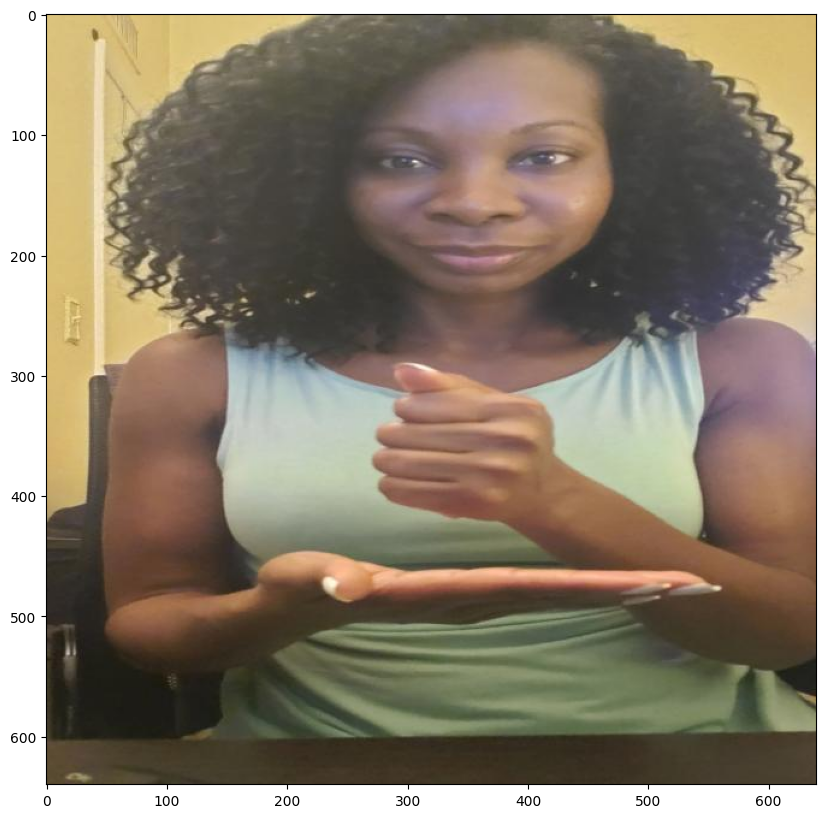

In [42]:
path = r"Rock-Paper-Scissors-SXSW-12\test\images\20220216_221819_jpg.rf.295ebb583293f91f74e1700f0ab0639a.jpg"
img = imread(path)
imshow(img)

In [43]:
result = model.predict(img, verbose=False)
#result = model.predict(img, verbose=False,conf=0.5)
#result = model.predict(img, verbose=False,classes=[5])
result = result[0] # because we provided a single image

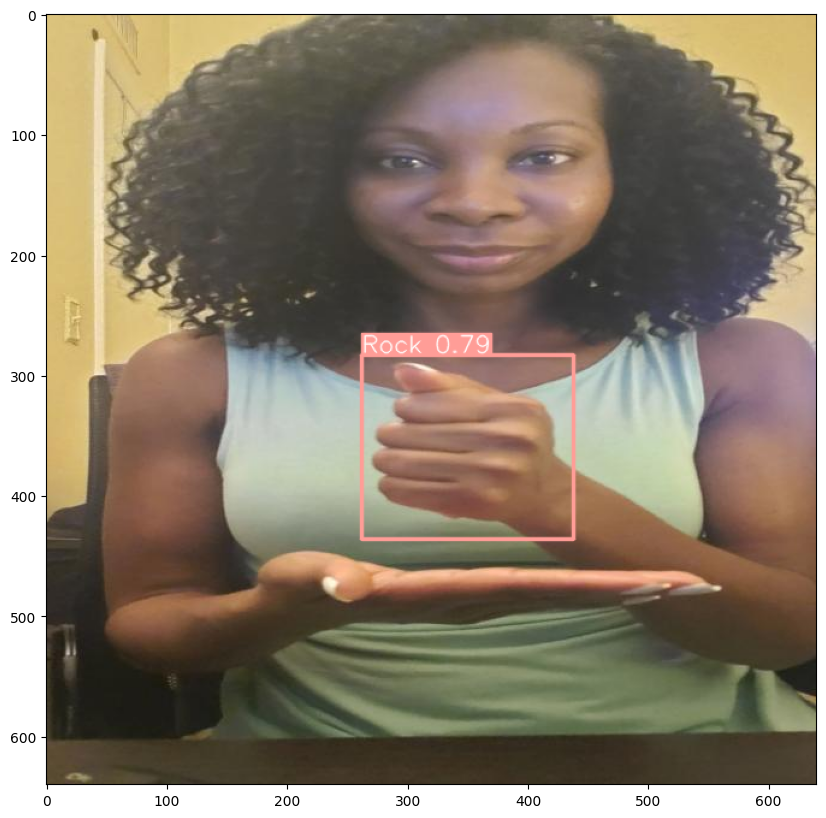

Image saved to "result.jpg"


In [44]:
result_img = result.plot() # BGR image
imshow(result_img)
imwrite(result_img, 'result.jpg')

In [45]:
# define a video capture object

#vid = cv2.VideoCapture('test-video.mp4')
vid = cv2.VideoCapture(0)

while(True):

    # Capture the video frame by frame
    success, frame = vid.read()
    
    # Break if we reach end of video
    if not success:
        break

    # Run YOLOv8 inference on the frame
    results = model(frame,conf=0.5)

    # Visualize the results on the frame
    annotated_frame = results[0].plot()
    
    # Display a "Press q to quit" message
    cv2.putText(annotated_frame, 'Press q to quit', (20, 20), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 255), 2)

    # Display the resulting frame
    cv2.imshow('yolo', annotated_frame)

    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()

# Destroy all the windows
cv2.destroyAllWindows()